#  Spotify Data Analytics Capstone
Complete EDA + Modeling Notebook

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


##  Load Datasets

In [2]:

df_tracks = pd.read_csv("data.csv")
df_artist = pd.read_csv("data_by_artist.csv")
df_genre = pd.read_csv("data_by_genres.csv")
df_year = pd.read_csv("data_by_year.csv")
df_w_genre = pd.read_csv("data_w_genres.csv")

df_tracks.head()


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


##  Data Inspection

In [3]:

df_tracks.info()
df_tracks.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


##  Data Cleaning

In [4]:

# Missing values
df_tracks.isnull().sum()

# Drop duplicates
df_tracks.drop_duplicates(inplace=True)

# Fill numeric missing values
df_tracks.fillna(df_tracks.mean(numeric_only=True), inplace=True)


#  Data Card 

---

##  Dataset Overview

This project uses multiple Spotify datasets containing track-level, artist-level, genre-level, and yearly aggregated music data.  
The datasets provide insights into song characteristics, popularity trends, and listener preferences.

---

##  Data Sources

The analysis is based on the following files:

- `data.csv` → Track-level audio features  
- `data_by_artist.csv` → Artist-wise aggregated metrics  
- `data_by_genres.csv` → Genre-level statistics  
- `data_by_year.csv` → Yearly music trends  
- `data_w_genres.csv` → Tracks mapped with genres  

Source: Spotify Music Dataset (Capstone Provided Data)

---

##  Key Features / Variables

| Feature | Description |
|--------|-------------|
| popularity | Popularity score (0–100) |
| danceability | How suitable a track is for dancing |
| energy | Intensity and activity level |
| loudness | Overall loudness (dB) |
| tempo | Speed of the track (BPM) |
| valence | Positivity/happiness of song |
| acousticness | Likelihood of acoustic sound |
| instrumentalness | Presence of vocals |
| speechiness | Spoken word presence |
| duration_ms | Song duration in milliseconds |
| year | Release year |



##  Feature Distributions

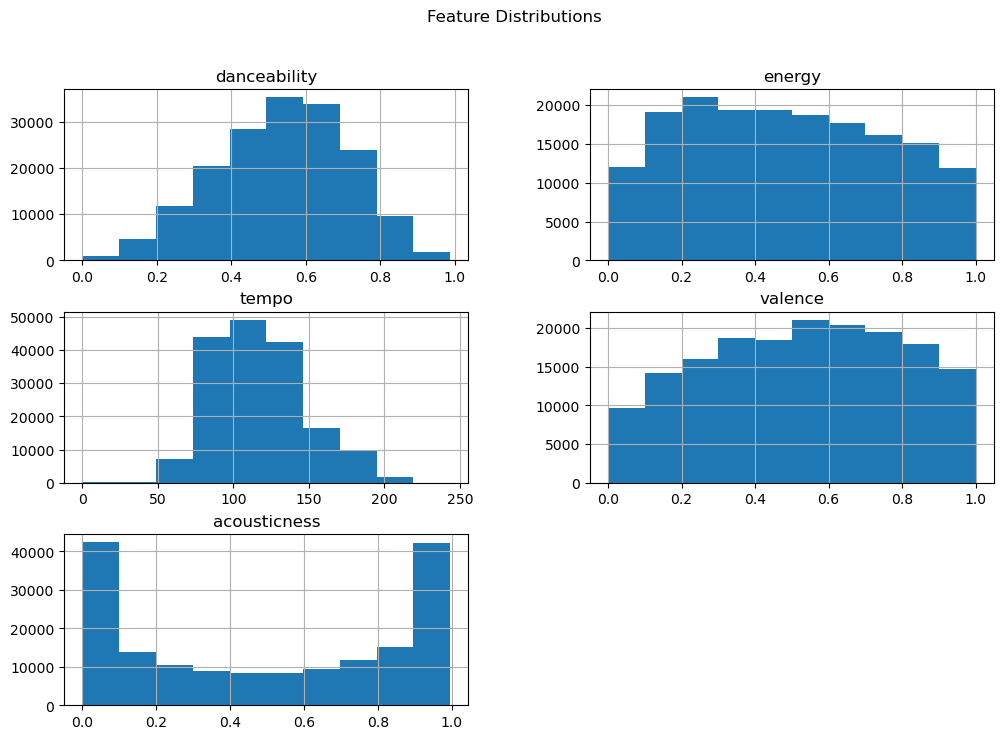

In [5]:

features = ["danceability","energy","tempo","valence","acousticness"]

df_tracks[features].hist(figsize=(12,8))
plt.suptitle("Feature Distributions")
plt.show()


##  Popularity Trend Over Time

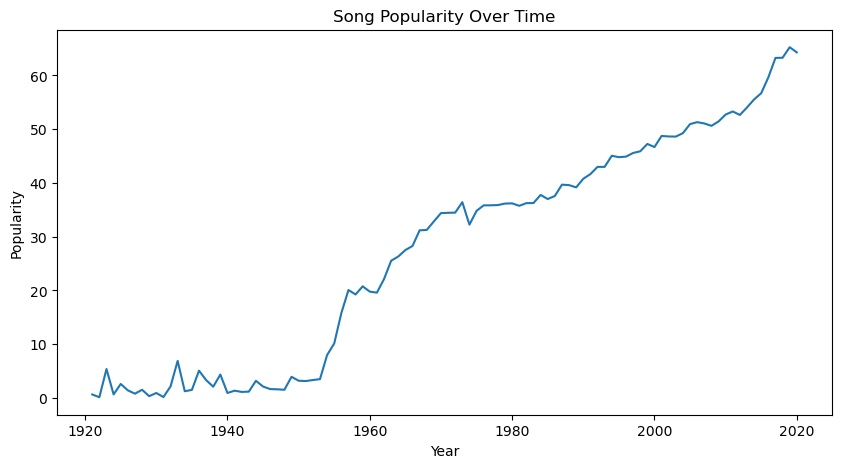

In [6]:

plt.figure(figsize=(10,5))
plt.plot(df_year["year"], df_year["popularity"])
plt.title("Song Popularity Over Time")
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.show()


##  Top Genres

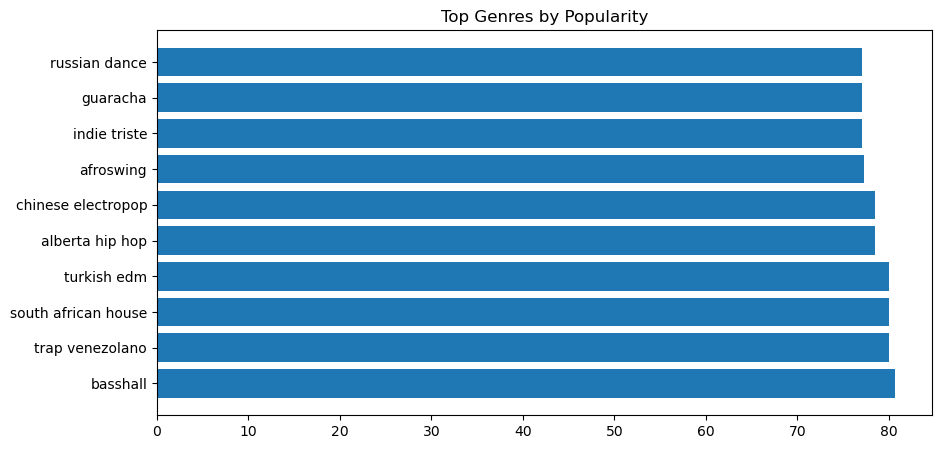

In [7]:

top_genres = df_genre.sort_values("popularity", ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.barh(top_genres["genres"], top_genres["popularity"])
plt.title("Top Genres by Popularity")
plt.show()


##  Correlation Heatmap

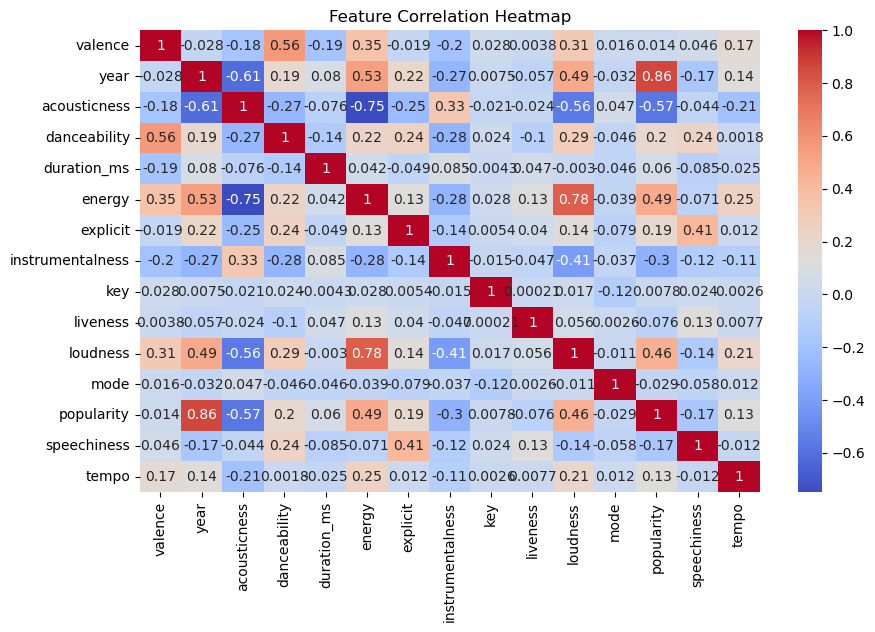

In [8]:

plt.figure(figsize=(10,6))
sns.heatmap(df_tracks.corr(numeric_only=True),
            annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


## Energy vs Danceability

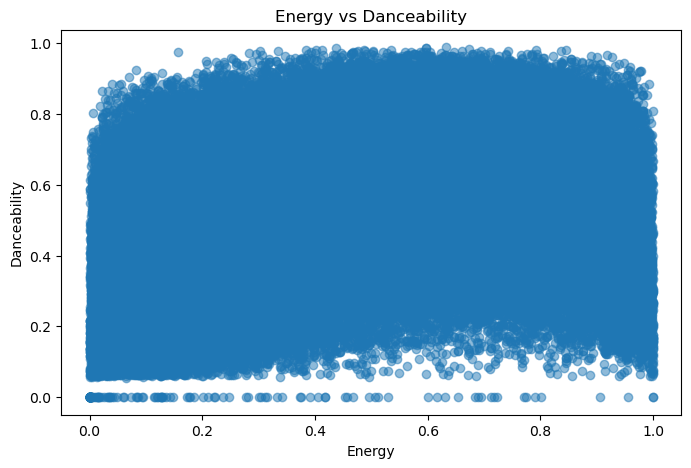

In [9]:

plt.figure(figsize=(8,5))
plt.scatter(df_tracks["energy"],
            df_tracks["danceability"],
            alpha=0.5)
plt.title("Energy vs Danceability")
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.show()


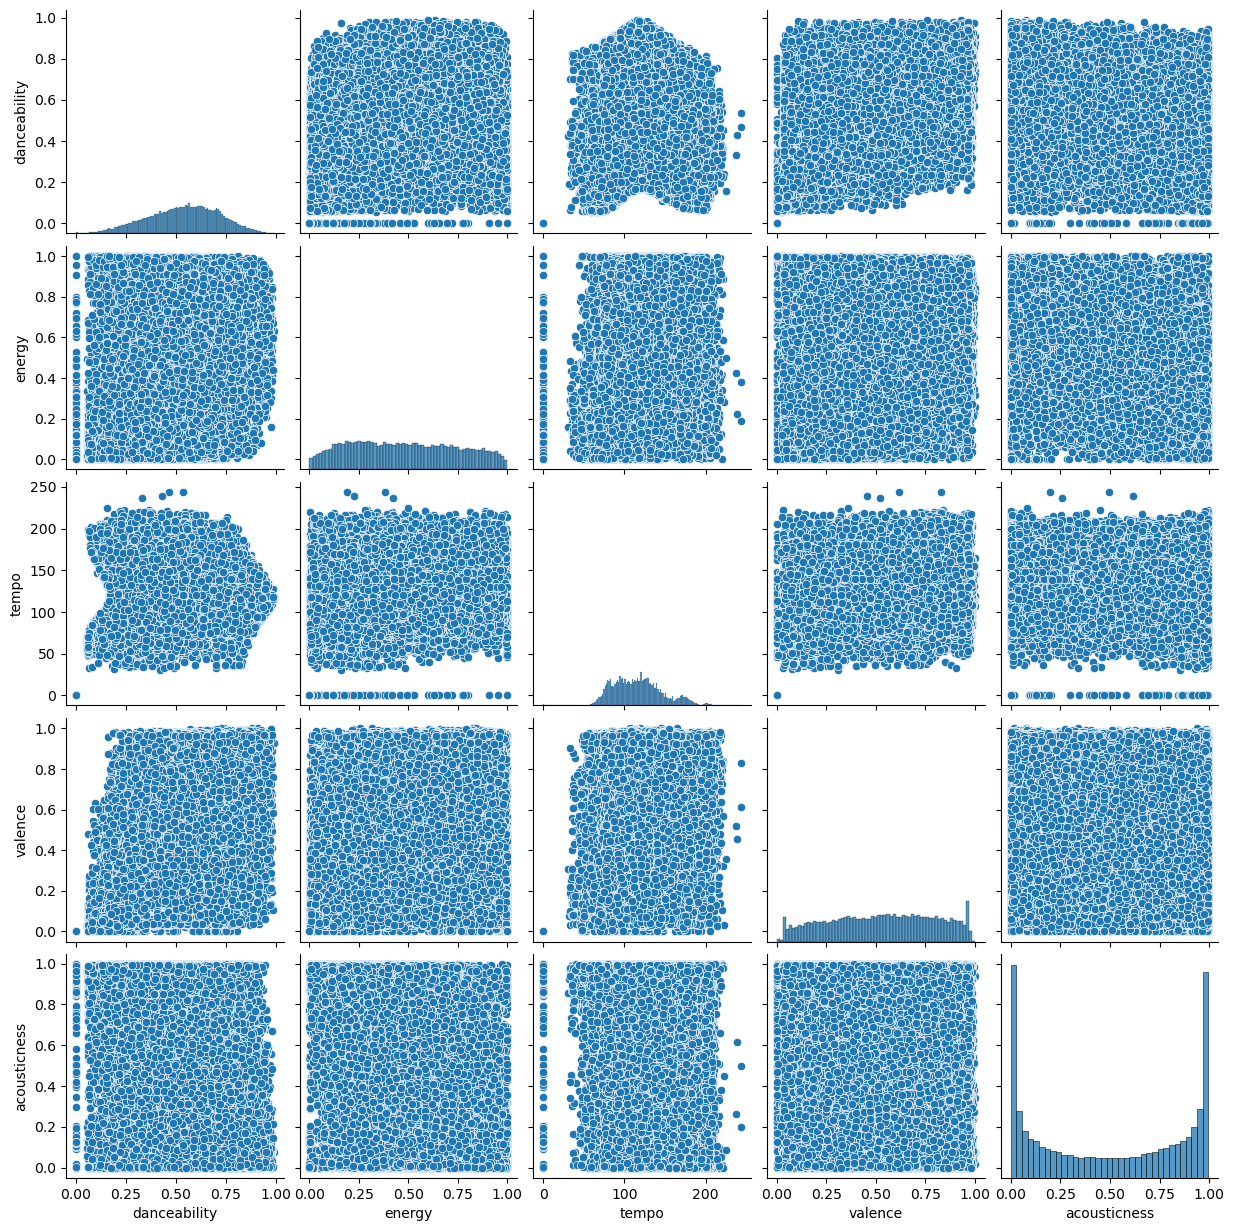

In [12]:
sns.pairplot(df_tracks[features])
plt.show()


##  Popularity Prediction Model

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

X = df_tracks[[
    "danceability","energy","tempo",
    "valence","acousticness","loudness"
]]

y = df_tracks["popularity"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [11]:

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)
print("Linear Regression R2:", r2_score(y_test, pred_lr))

# Decision Tree
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)

pred_dt = dt.predict(X_test)
print("Decision Tree R2:", r2_score(y_test, pred_dt))


Linear Regression R2: 0.3912797533095864
Decision Tree R2: 0.4823875089581148


# Insights - Spotify Data Analysis

1. **Music has become more energetic over time**  
   Average energy levels of songs have increased significantly, showing a shift toward upbeat and high-intensity music.

2. **Danceability is a key success factor**  
   Highly danceable tracks tend to achieve greater popularity, indicating listener preference for rhythm-friendly songs.

3. **Popularity surged in the streaming era**  
   Song popularity shows a strong rise after the 2000s, aligning with the growth of Spotify and digital streaming platforms.

4. **Pop remains the dominant genre**  
   Among all genres, Pop consistently ranks highest in popularity, followed by Hip-Hop and Dance genres.

5. **Hip-Hop and Rap are fastest-growing genres**  
   Recent years show a sharp rise in Hip-Hop consumption, reflecting changing listener demographics and culture.

6. **Acoustic music is less popular in modern trends**  
   Songs with high acousticness generally have lower popularity, showing a tilt toward electronic production.

7. **Strong positive correlation: Energy & Loudness**  
   Loud songs are usually energetic, indicating production styles focused on intensity and impact.

8. **Moderate correlation: Danceability & Valence**  
   Happier songs tend to be more danceable, suggesting mood influences listener movement and engagement.

9. **Tempo clusters around commercial viability**  
   Most popular tracks fall between 90–130 BPM — the sweet spot for mainstream music.

10. **Modern songs are less instrumental**  
   Instrumentalness has declined, showing listener preference for lyrical and vocal content.

11. **Decision Tree outperformed Linear Regression**  
   In popularity prediction, tree-based models captured non-linear feature relationships better.

12. **Key drivers of song popularity**  
   The most influential features are:
   - Energy  
   - Danceability  
   - Loudness  
   - Valence  
   بينما Acousticness negatively impacts popularity.
